In [1]:
%env WORKDIR ~/Documents/weatherpy-work/

import sys
sys.path.append('..')

from wxdata import stormevents

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

env: WORKDIR=~/Documents/weatherpy-work/


## Load the tornado data for 4/14/12 and find the clusters

In [2]:
df = stormevents.tornadoes('2012-04-14 12:00', '2012-04-15 12:00', tz='UTC')

In [3]:
clusters = stormevents.clust.st_clusters(df, eps_km=60, eps_min=60, min_samples=15)

### Create some utility functions for plotting

In [4]:
from mpl_toolkits.basemap import Basemap

def get_basemap(llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat):
    m = Basemap(projection='merc', 
            llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat,
            resolution='i',area_thresh=1000)

    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.drawcounties()
    draw_hways(m)
    return m

def draw_hways(m):
    m.readshapefile('hways/hways', 'hways', drawbounds=True, color='red', linewidth=0.35)

def watermark(ax):
    plt.text(0.99, 0.01, 'Graphic created by Jim Tang (@wxmann)', transform=ax.transAxes, fontsize=16,
        verticalalignment='bottom', horizontalalignment='right', 
        bbox=dict(alpha=0.75, facecolor='white', edgecolor='gray'))

Three notable cities were affected by the tornado outbreak:
* Wichita, KS (hit by an EF3 tornado; 38 injuries)
* Salina, KS (narrowly avoided being hit by an EF4 tornado)
* Woodward, OK (hit by an EF3 tornado; six fatalities)
* Creston, IA (hit by an EF2 tornado; 10 injuries)

For convenience, these cities will be plotted.

Other larger cities in the Great Plains will be plotted as well.

In [5]:
wichita = (37.69, -97.33)
salina = (38.84, -97.61)
woodward = (36.43, -99.39)
creston = (41.06, -94.36)

tornado_cities = (wichita, salina, woodward, creston)

ddc = (37.75, -100.02)
hays = (38.88, -99.33)
kc = (39.10, -94.56)
omaha = (41.25, -96.00)
north_platte = (41.14, -100.76)
hastings = (40.59, -98.39)

label_map = {
    wichita: 'Wichita',
    salina: 'Salina',
    woodward: 'Woodward',
    creston: 'Creston',
    
    ddc: 'Dodge City',
    hays: 'Hays',
    kc: 'Kansas City',
    omaha: 'Omaha',
    north_platte: 'North Platte',
    hastings: 'Hastings'
}

def plot_major_cities(basemap, cities=None, alpha=0.6):
    if cities is None:
        cities = label_map.keys()
    for city in cities:
        x, y = basemap(*reversed(city))
        basemap.plot(x, y, '+', markersize=9, color='k', alpha=alpha)
        
        labelx, labely = basemap(city[1] + 0.05, city[0] - 0.15)
        plt.text(labelx, labely, label_map[city], fontsize=12, alpha=alpha)

## Summary Map

In [13]:
import importlib
importlib.reload(stormevents.clusters)

<module 'wxdata.stormevents.clusters' from '../wxdata/stormevents/clusters.py'>

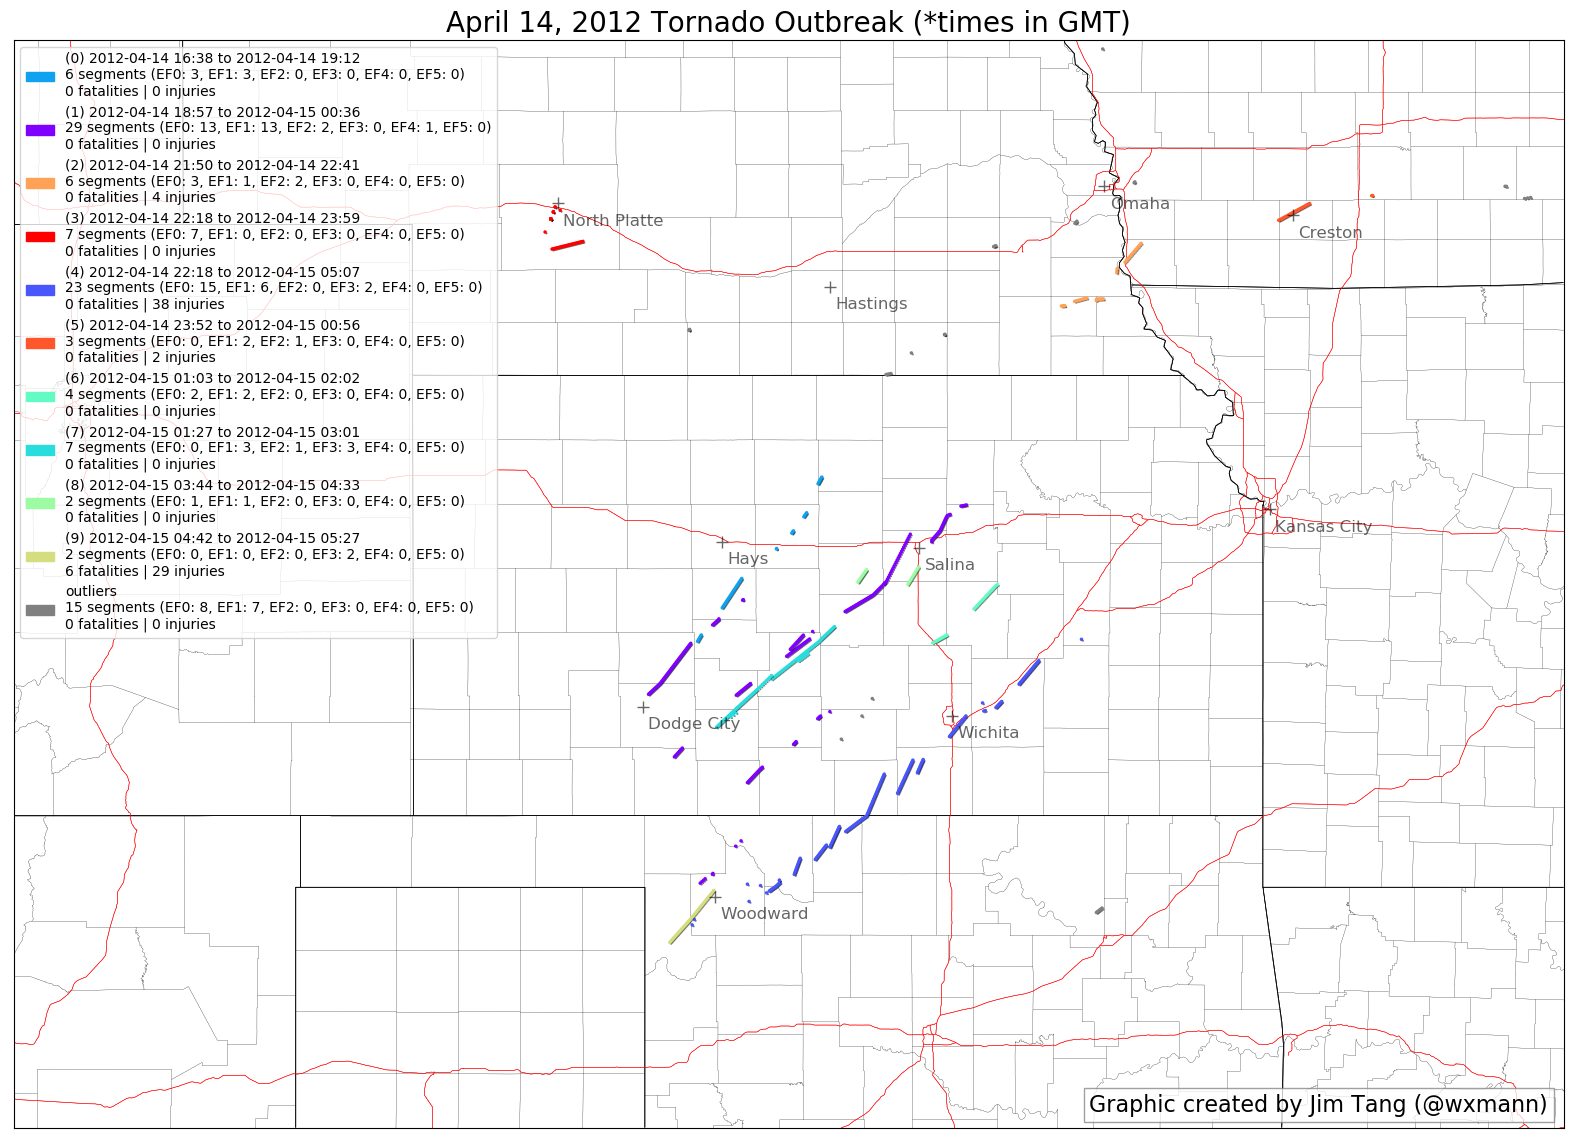

In [14]:
from wxdata.utils import sample_colors
from wxdata.stormevents.clusters import plot_clusters, legend_labels

fig = plt.figure(figsize=(20, 20), dpi=100)

bbox = (-105.5, -92, 34.8, 42.2)
colors = sample_colors(len(clusters), 'rainbow')
bg_map = get_basemap(*bbox)
plot_clusters(clusters, bg_map, colors)

plt.legend(handles=legend_labels(clusters, colors), loc=2, ncol=1, fontsize='medium')
plt.title('April 14, 2012 Tornado Outbreak (*times in GMT)', fontsize=20)

watermark(fig.axes[0])
plot_major_cities(bg_map)
draw_hways(bg_map)
plt.show()

## Cluster B (First round of supercells; DDC - SLN - north of WWD)

In [11]:
clustb = clusters.clusters[1]
clustb.summary()

{'center': (38.16995096899226, -98.72926434108527),
 'max_time': Timestamp('2012-04-15 00:35:00+0000', tz='UTC'),
 'min_time': Timestamp('2012-04-14 18:57:00+0000', tz='UTC'),
 'size': 258,
 'time_spread': Timedelta('0 days 05:38:00')}

In [ ]:
def plot_cluster_timed(clust):
    pts = clust.pts
    
    dt = clust.end_time - clust.begin_time
    
    max_hour = clust.end_time.hour
    min_hour = clust.begin_time.hour
    hours = list(range(min_hour, max_hour + 1))
    
    colors = sample_colors(max_hour - min_hour, 'gist_rainbow')

In [12]:
clustclustb.pts.timestamp

,lat,lon,event_id,timestamp,cluster
0,36.787400,-99.210000,379730,2012-04-14 21:26:00+00:00,0
36,37.493600,-98.705600,380478,2012-04-14 21:44:00+00:00,0
37,37.498400,-98.700000,380478,2012-04-14 21:45:00+00:00,0
38,37.503200,-98.694400,380478,2012-04-14 21:46:00+00:00,0
39,37.508000,-98.688800,380478,2012-04-14 21:47:00+00:00,0
40,37.512800,-98.683200,380478,2012-04-14 21:48:00+00:00,0
41,37.671100,-98.495300,380479,2012-04-14 22:08:00+00:00,0
42,37.675780,-98.489160,380479,2012-04-14 22:09:00+00:00,0
43,37.680460,-98.483020,380479,2012-04-14 22:10:00+00:00,0
44,37.685140,-98.476880,380479,2012-04-14 22:11:00+00:00,0
